In [1]:
import numpy as np
from keras.models import load_model
from PIL import Image
import cv2

In [2]:
from matplotlib import pyplot as plt

In [3]:
def area(x1,x2,y1,y2):
    area_=(x2-x1)*(y2-y1)
    return area_

In [4]:
def IOU(a,b):
    x1=max(a[0],b[0])
    y1=max(a[1],b[1])
    x2=min(a[2],b[2])
    y2=min(a[3],b[3])
    if (x1<=x2 and y1<=y2):
        iou=area(x1,x2,y1,y2)/(area(a[0],a[2],a[1],a[3])+area(b[0],b[2],b[1],b[3])-area(x1,x2,y1,y2))
    else:
        iou=0
    return iou

In [5]:
model1 = load_model("Model1.h5")

In [6]:
model2=load_model('Model2.h5')

In [33]:
img=Image.open('d4.jpg')

In [34]:
img=img.convert('L')

In [35]:
img=np.array(img) 
img=255-img
b=np.std(img)  
th=np.mean(img)+(b/2)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if(img[i][j]<=th):
            img[i][j]=0

In [36]:
img = Image.fromarray(img)

In [37]:
frame=np.array(img)

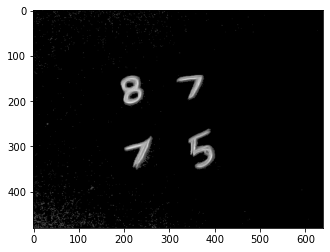

In [38]:
plt.imshow(img,cmap='gray')

In [39]:
centers=[(40,40),(50,70),(50,40),(40,50)]
font = cv2.FONT_HERSHEY_SIMPLEX
dict_={}
for i in range(10):
    dict_[i]=[]
for i in range(20):
    for j in range(20):
        x1=j*16
        y1=i*12
        y2=(i+1)*16
        x2=(j+1)*12
        for k in range(4):
            if ((x1+x2-centers[k][0])>=0 and (x1+x2+centers[k][0])<640):
                if ((y1+y2-centers[k][1])>=0 and (y1+y2+centers[k][1])<480):
                    im1 = img.crop(((x1+x2-centers[k][0]), (y1+y2-centers[k][1]),(x1+x2+centers[k][0]), (y1+y2+centers[k][1])))
                    im1=im1.resize((28,28))
                    im1=np.array(im1)               
                    im1=im1/255
                    im1=im1.reshape((28,28,1))
                    X=np.zeros((1,28,28,1))
                    X[0]=im1
                    prediction = model2.predict(X)
                    c=prediction.argmax(1)
                    if(prediction[0][c[0]]>=0.99):
                        prediction = model1.predict(X)
                        c=prediction.argmax(1)
                        if(prediction[0][c[0]]>=0.6):
                            dict_[c[0]].append((((x1+x2-centers[k][0]), (y1+y2-centers[k][1]),(x1+x2+centers[k][0]), (y1+y2+centers[k][1])),prediction[0][c[0]]))

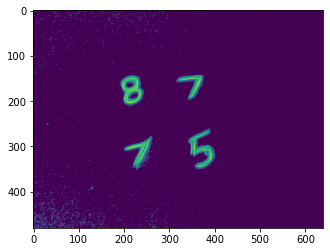

In [40]:
plt.imshow(frame)

In [41]:
dict_

{0: [],
 1: [],
 2: [((158, 58, 258, 198), 0.8991116),
  ((308, 228, 388, 308), 0.6117977),
  ((298, 198, 398, 338), 0.95450425),
  ((326, 198, 426, 338), 0.7403712),
  ((326, 228, 426, 308), 0.72988635)],
 3: [((326, 282, 426, 422), 0.67596096)],
 4: [((196, 256, 276, 336), 0.72811407), ((186, 256, 286, 336), 0.77673966)],
 5: [((326, 226, 426, 366), 0.94535816), ((336, 246, 416, 346), 0.7353599)],
 6: [((168, 116, 248, 196), 0.8025053),
  ((158, 86, 258, 226), 0.8699412),
  ((158, 116, 258, 196), 0.6044882),
  ((168, 106, 248, 206), 0.9028053)],
 7: [((308, 116, 388, 196), 0.9980452),
  ((298, 86, 398, 226), 0.76802194),
  ((298, 116, 398, 196), 0.9906093),
  ((308, 106, 388, 206), 0.99274784),
  ((308, 134, 388, 234), 0.6467126),
  ((158, 254, 258, 394), 0.84998465),
  ((186, 254, 286, 394), 0.8414713),
  ((196, 274, 276, 374), 0.74804217),
  ((336, 284, 416, 364), 0.7530919),
  ((326, 254, 426, 394), 0.8294557),
  ((326, 284, 426, 364), 0.8792204),
  ((336, 274, 416, 374), 0.920705

In [43]:
for i in range(10):
    for ii in range(i+1,10):
        j=0
        while(j<len(dict_[i])):
            k=0
            while(k <len(dict_[ii])):
                if(dict_[ii][k]==0 or dict_[i][j]==0):
                    k=k+1
                    continue
                if ((dict_[i][j])!=dict_[ii][k] and IOU(dict_[i][j][0],dict_[ii][k][0])>0):
                    if(dict_[i][j][1]>dict_[ii][k][1]):
                        dict_[ii][k]=0
                    else:
                        dict_[i][j]=0
                    print(i,dict_[i][j],ii,dict_[ii][k])
                k=k+1
            j=j+1

In [44]:
for i in range(10):
    j=0
    while(j<len(dict_[i])):
        k=0
        while(k <len(dict_[i])):
            if(dict_[i][k]==0 or dict_[i][j]==0):
                k=k+1
                continue
            if ((dict_[i][j])!=dict_[i][k] and IOU(dict_[i][j][0],dict_[i][k][0])>0):
                if(dict_[i][j][1]>dict_[i][k][1]):
                    dict_[i][k]=0
                else:
                    dict_[i][j]=0
            k=k+1
        
        j=j+1

In [45]:
dict_

{0: [],
 1: [],
 2: [0, 0, 0, 0, 0],
 3: [0],
 4: [0, 0],
 5: [0, 0],
 6: [0, 0, 0, 0],
 7: [((308, 116, 388, 196), 0.9980452),
  0,
  0,
  0,
  0,
  ((158, 254, 258, 394), 0.84998465),
  0,
  0,
  0,
  0,
  0,
  ((336, 274, 416, 374), 0.92070544),
  0],
 8: [0, 0, 0, ((168, 134, 248, 234), 0.99056107)],
 9: []}

In [46]:
for i in range(10):
    for j in dict_[i]:
        if j==0:
            continue
        cv2.rectangle(frame,(j[0][0],j[0][1]),(j[0][2],j[0][3]),(255,0,0),3)
        overlay_text = "%s " % (i)
        cv2.putText(frame, overlay_text, (j[0][2],j[0][3]), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

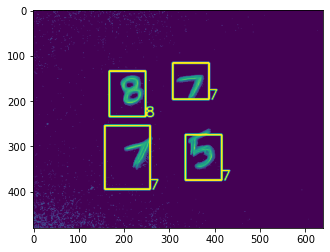

In [47]:
plt.imshow(frame)